# Building Regression Models

In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import datetime
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lars
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

## Automobile Dataset

#### Business problem - predict the miles per gallon based on other features such as horsepower, age of car etc. 

In [86]:
automobile_df = pd.read_csv('datasets/auto-mpg.csv')
print(automobile_df.shape)
automobile_df.sample(5)

(398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
303,31.8,4,85.0,65,2020,19.2,79,3,datsun 210
282,22.3,4,140.0,88,2890,17.3,79,1,ford fairmont 4
21,24.0,4,107.0,90,2430,14.5,70,2,audi 100 ls
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
180,25.0,4,121.0,115,2671,13.5,75,2,saab 99le


### Cleaning

In [87]:
# Data cleaning
automobile_df = automobile_df.replace("?",np.nan)
automobile_df = automobile_df.dropna()

In [88]:
automobile_df.shape

(392, 9)

In [89]:
# Drop unwanted columns
automobile_df.drop(columns = ["car name","origin"],axis = 1, inplace = True)

In [90]:
# Convert model year to age of the car
automobile_df["model year"] = '19' + automobile_df["model year"].astype(str)

In [91]:
# Convert current date to datetime, extract the model year expressed as numeric to get the age
automobile_df["age"] = datetime.datetime.now().year - pd.to_numeric(automobile_df["model year"])
automobile_df.drop(columns = ["model year"],axis = 1,inplace = True)
automobile_df.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,18.0,8,307.0,130,3504,12.0,51
1,15.0,8,350.0,165,3693,11.5,51


In [92]:
# Check the datatypes
automobile_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   age           392 non-null    int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 24.5+ KB


In [93]:
# Convert horsepower from object to numeric data type
automobile_df["horsepower"] = pd.to_numeric(automobile_df["horsepower"], errors = "coerce")

In [94]:
# Look at the basic statistics - measures of spread and dispersion. Note the differences between features requiring scaling
automobile_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,45.020408
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,39.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,42.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,45.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,48.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,51.000000


### Visualisation

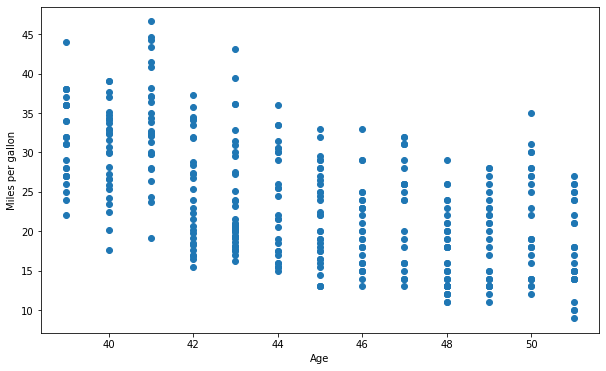

In [97]:
# Scatter plots to examine relationships
fig, ax = plt.subplots(figsize=(10,6))

plt.scatter(automobile_df['age'], automobile_df['mpg'])

plt.xlabel('Age')
ax = plt.ylabel('Miles per gallon')

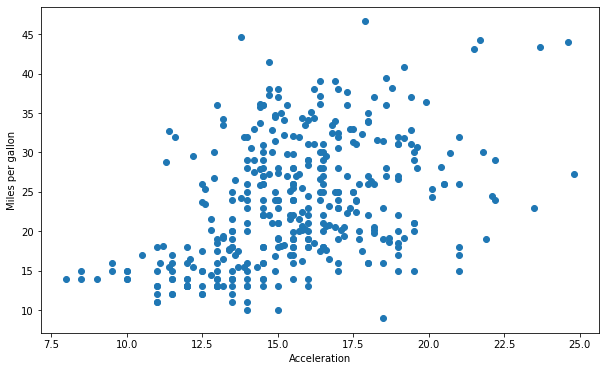

In [98]:
fig, ax = plt.subplots(figsize=(10,6))

plt.scatter(automobile_df['acceleration'], automobile_df['mpg'])

plt.xlabel('Acceleration')
ax = plt.ylabel('Miles per gallon')

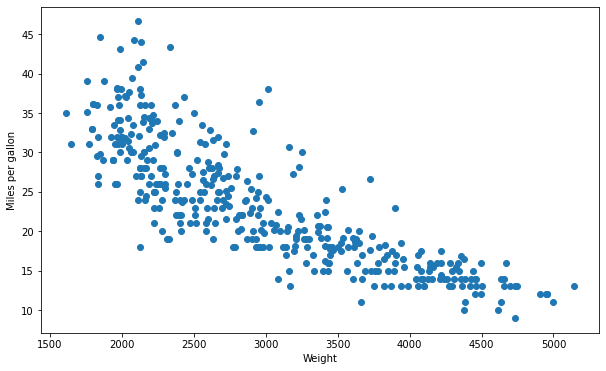

In [99]:
fig, ax = plt.subplots(figsize=(10,6))

plt.scatter(automobile_df['weight'], automobile_df['mpg'])

plt.xlabel('Weight')
ax = plt.ylabel('Miles per gallon')

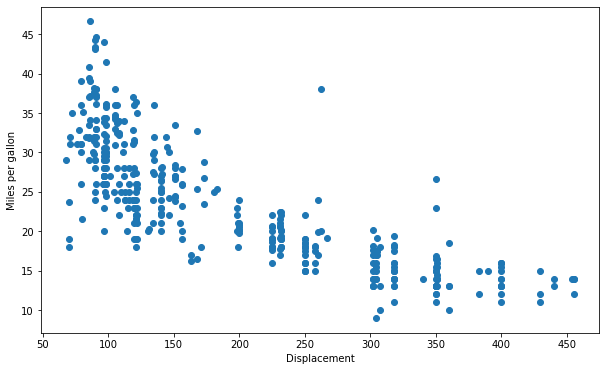

In [100]:
fig, ax = plt.subplots(figsize=(10,6))

plt.scatter(automobile_df['displacement'], automobile_df['mpg'])

plt.xlabel('Displacement')
ax = plt.ylabel('Miles per gallon')

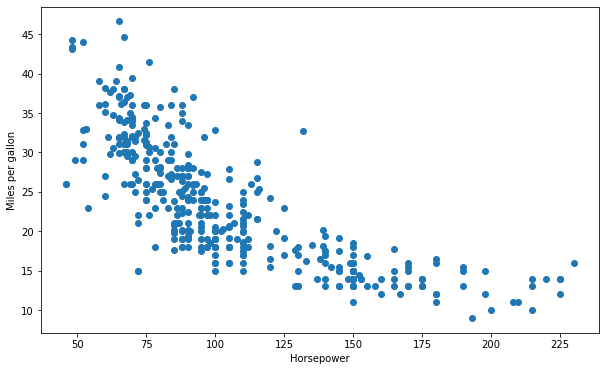

In [101]:
fig, ax = plt.subplots(figsize=(10,6))

plt.scatter(automobile_df['horsepower'], automobile_df['mpg'])

plt.xlabel('Horsepower')
ax = plt.ylabel('Miles per gallon')

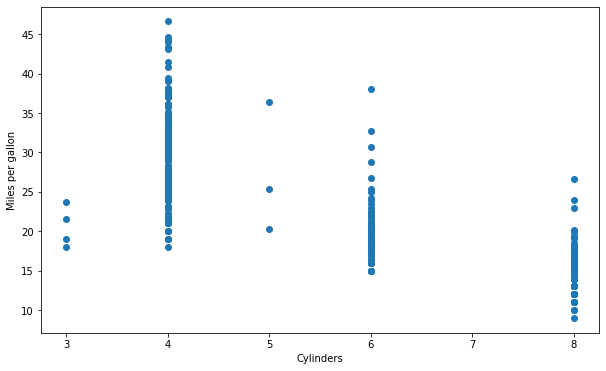

In [102]:
fig, ax = plt.subplots(figsize=(10,6))

plt.scatter(automobile_df['cylinders'], automobile_df['mpg'])

plt.xlabel('Cylinders')
ax = plt.ylabel('Miles per gallon')

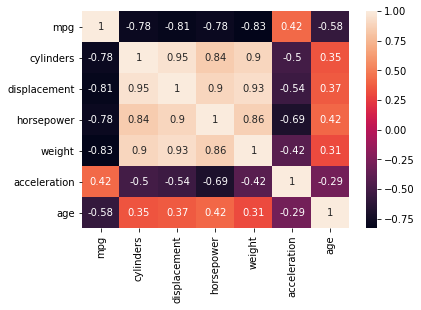

In [112]:
automobile_corr = automobile_df.corr()
ax =sns.heatmap(automobile_corr, annot=True)

Most features are inversely related to the miles per gallon

In [105]:
automobile_df = automobile_df.sample(frac=1).reset_index(drop=True)

## Simple Linear Regression (one feature to predict mpg based on horsepower)

In [113]:
# Set X and y variables and split the dataset
X = automobile_df[['horsepower']]
Y = automobile_df['mpg']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [114]:
linear_model = LinearRegression(normalize=True).fit(x_train, y_train)
print('Training score: ', linear_model.score(x_train, y_train))

Training score:  0.6016300919669835


In [115]:
y_pred = linear_model.predict(x_test)
print('Testing score: ', r2_score(y_test, y_pred))

Testing score:  0.6233040963337867


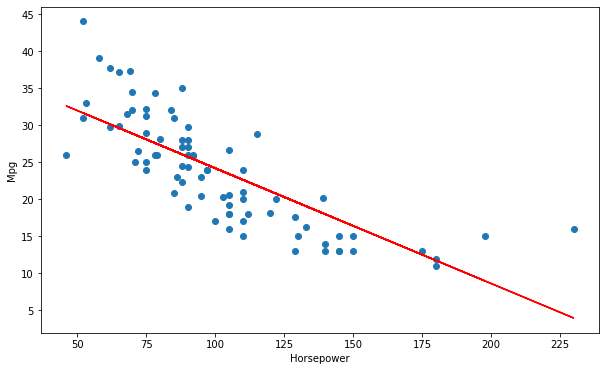

In [116]:
fig, ax = plt.subplots(figsize=(10,6))

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='r')

plt.xlabel('Horsepower')
plt.ylabel('Mpg')
plt.show()

In [117]:
linear_model.coef_

array([-0.15553263])

## Simple Linear Regression (one feature - age of car)

In [118]:
X = automobile_df[['age']]
Y = automobile_df['mpg']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

print('Training score: ', linear_model.score(x_train, y_train))

y_pred = linear_model.predict(x_test)

print('Testing score: ', r2_score(y_test, y_pred))

Training score:  0.34918430103084597
Testing score:  0.2823265524975467


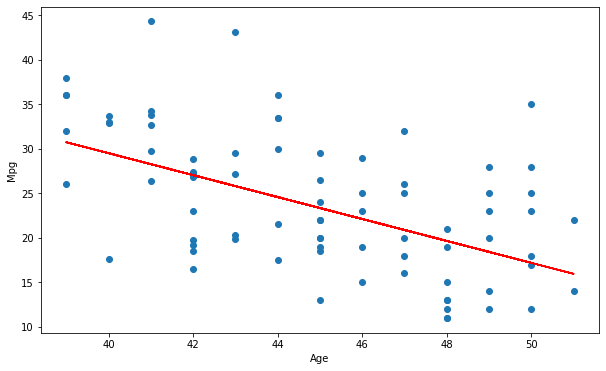

In [119]:
fig, ax = plt.subplots(figsize=(10,6))

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='r')

plt.xlabel('Age')
plt.ylabel('Mpg')
plt.show()

In [120]:
linear_model.coef_

array([-1.23167642])

## Multiple Linear Regression

In [121]:
X = automobile_df[['displacement', 'horsepower', 'weight']]
Y = automobile_df['mpg']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
linear_model = LinearRegression(normalize = True)
linear_model.fit(x_train, y_train)

LinearRegression(normalize=True)

In [122]:
print('Training score: ', linear_model.score(x_train, y_train))

Training score:  0.7117800048838774


In [123]:
# Get the coefficients
predictors = x_train.columns
coef = pd.Series(linear_model.coef_, predictors).sort_values()
print(coef)

horsepower     -0.047104
weight         -0.005419
displacement   -0.005194
dtype: float64


In [124]:
y_pred = linear_model.predict(x_test)

In [125]:
print('Testing score: ', r2_score(y_test, y_pred))

Testing score:  0.6675716353293599


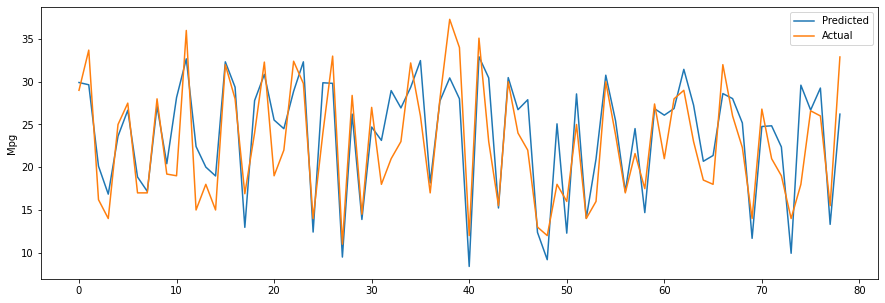

In [126]:
plt.figure(figsize = (15,5))

plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')

plt.ylabel('Mpg')

plt.legend()
plt.show()

In [127]:
# Use all the features - kitchen sink regression
X = automobile_df[['displacement', 'horsepower', 'weight',"acceleration","cylinders"]]
Y = automobile_df['mpg']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
linear_model = LinearRegression(normalize = True)
linear_model.fit(x_train, y_train)

LinearRegression(normalize=True)

In [128]:
print('Training score: ', linear_model.score(x_train, y_train))

Training score:  0.7202737785960711


In [130]:
# Poorer score on test data
y_pred = linear_model.predict(x_test)
print('Testing score: ', r2_score(y_test, y_pred))

Testing score:  0.6545022872568802


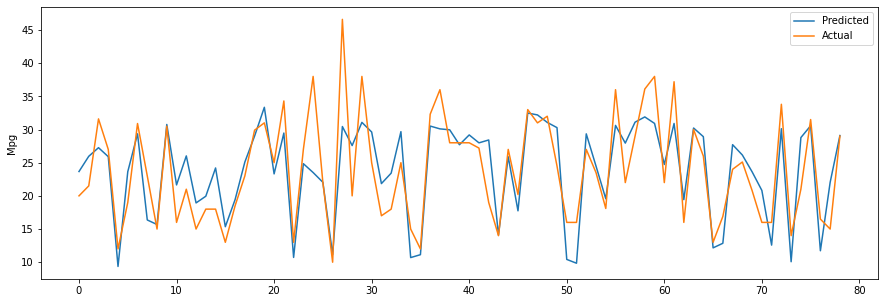

In [131]:
plt.figure(figsize = (15,5))

plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')

plt.ylabel('Mpg')

plt.legend()
plt.show()

## Regression Using Categorical Variables - Exam Scores

In [169]:
exam_df = pd.read_csv("datasets/exams.csv")

In [170]:
exam_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group E,associate's degree,standard,none,70,76,69
1,female,group C,some college,standard,none,47,52,50
2,male,group E,high school,standard,none,75,72,68
3,female,group B,some college,free/reduced,completed,44,52,54
4,female,group B,bachelor's degree,standard,completed,67,76,80


In [171]:
exam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       100 non-null    object
 1   race/ethnicity               100 non-null    object
 2   parental level of education  100 non-null    object
 3   lunch                        100 non-null    object
 4   test preparation course      100 non-null    object
 5   math score                   100 non-null    int64 
 6   reading score                100 non-null    int64 
 7   writing score                100 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 6.4+ KB


In [172]:
exam_df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [173]:
exam_df.describe()

,math score,reading score,writing score
count,100.000000,100.000000,100.000000
mean,66.730000,69.980000,69.140000
std,15.631395,13.732642,14.886792
min,18.000000,25.000000,20.000000
25%,58.000000,61.000000,62.000000
50%,69.000000,71.500000,69.000000
75%,78.250000,80.000000,81.000000
max,96.000000,94.000000,93.000000


In [174]:
# Scale the exam scores to put all values with zero mean and unit variance (good to compare values with different distributions) 
exam_df["math score"] = preprocessing.scale(exam_df["math score"])
exam_df["reading score"] = preprocessing.scale(exam_df["reading score"])
exam_df["writing score"] = preprocessing.scale(exam_df["writing score"])

In [175]:
exam_df.describe()

,math score,reading score,writing score
count,1.000000e+02,1.000000e+02,1.000000e+02
mean,-2.642331e-16,-3.048950e-16,-4.468648e-17
std,1.005038e+00,1.005038e+00,1.005038e+00
min,-3.133149e+00,-3.291909e+00,-3.317542e+00
25%,-5.613050e-01,-6.572107e-01,-4.820360e-01
50%,1.459522e-01,1.112428e-01,-9.451687e-03
75%,7.406911e-01,7.333242e-01,8.006929e-01
max,1.881947e+00,1.757929e+00,1.610838e+00


### Label Encode Categorical Variables with Order

In [176]:
exam_df["parental level of education"].value_counts()

some college          25
associate's degree    21
some high school      18
high school           16
bachelor's degree     13
master's degree        7
Name: parental level of education, dtype: int64

In [177]:
# Label encoder for variables with ordering
label_encoded = LabelEncoder()
exam_df["parental level of education"] = label_encoded.fit_transform(exam_df["parental level of education"]).astype(str)

In [178]:
label_encoded.classes_

array(["associate's degree", "bachelor's degree", 'high school',
       "master's degree", 'some college', 'some high school'],
      dtype=object)

### One - Hot Encoding for Variables with No Ordering

In [179]:
exam_df = pd.get_dummies(exam_df, columns = ["race/ethnicity","gender","lunch","test preparation course"])
exam_df.head(2)

,parental level of education,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,gender_female,gender_male,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,0,0.210248,0.440580,-0.009452,0,0,0,0,1,1,0,0,1,0,1
1,4,-1.268562,-1.315885,-1.292181,0,0,1,0,0,1,0,0,1,0,1


In [180]:
exam_df.shape

(100, 15)

In [181]:
X = exam_df.drop('math score', axis=1)
Y = exam_df['math score']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
linear_model = LinearRegression(fit_intercept=True).fit(x_train, y_train)
print("Training_score : " , linear_model.score(x_train, y_train))

Training_score :  0.8881065617393541


In [182]:
y_pred = linear_model.predict(x_test)
print("Testing_score : ", r2_score(y_test, y_pred))

Testing_score :  0.8589964964486482


#### When the categorical variables are encoded with one-hot encoding AND the fit intercept = True, there is a risk of encountering multicollinearity. This is ignored by the Linear Model which always sets the fit_intercept to False if you use one-hot encoding. If you want to set the fit intercept to true the alternative action is to set drop first = True when you encode the variables).

In [183]:
linear_model = LinearRegression(fit_intercept=False).fit(x_train, y_train)
print("Training_score : " , linear_model.score(x_train, y_train))

Training_score :  0.8881065617393541


In [184]:
y_pred = linear_model.predict(x_test)
print("Testing_score : ", r2_score(y_test, y_pred))

Testing_score :  0.8589964964486456


In [186]:
df_pred_actual = pd.DataFrame({'predicted': y_pred, 'actual': y_test})
df_pred_actual.head(10)

,predicted,actual
46,-0.616193,-1.011378
90,0.278521,0.081656
41,-1.884064,-2.233004
93,0.350522,-0.239824
94,0.451843,0.274544
19,0.813534,0.531729
49,0.767531,0.788913
43,-1.398773,-1.204266
15,1.171274,1.174690
28,0.806064,0.210248


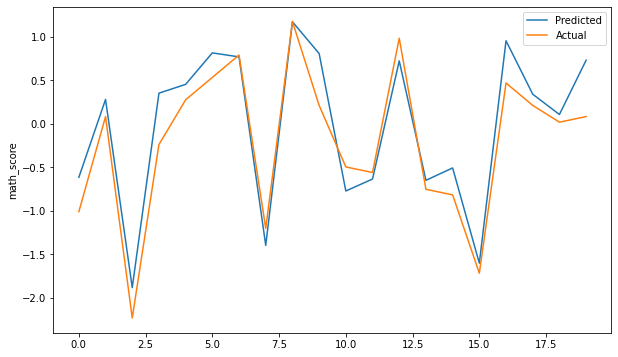

In [187]:
plt.figure(figsize = (10,6))
plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('math_score')
plt.legend()
plt.show()

### Predict the Maths Score without any of the other Scores

In [188]:
X = exam_df.drop(['math score', 'writing score', 'reading score'], axis=1)
Y = exam_df['math score']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

linear_model = LinearRegression(fit_intercept=True).fit(x_train, y_train)
print("Training_score : " , linear_model.score(x_train, y_train))

y_pred = linear_model.predict(x_test)
print("Testing_score : ", r2_score(y_test, y_pred))

Training_score :  0.2907491845476765
Testing_score :  0.2988003588264173


### Predict the Math Score with just the Reading Score

In [189]:
X = exam_df.drop(['math score', 'writing score'], axis=1)
Y = exam_df['math score']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

linear_model = LinearRegression(fit_intercept=True).fit(x_train, y_train)
print("Training_score : " , linear_model.score(x_train, y_train))

y_pred = linear_model.predict(x_test)
print("Testing_score : ", r2_score(y_test, y_pred))

Training_score :  0.8568071127617702
Testing_score :  0.6895038951033328


## Other Regression Models

In [192]:
automobile_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,25.4,6,168.0,116,2900,12.6,40
1,17.0,6,250.0,100,3329,15.5,50
2,34.0,4,112.0,88,2395,18.0,39
3,22.0,4,108.0,94,2379,16.5,48
4,28.0,4,97.0,75,2155,16.4,45


In [193]:
# Dictionary to hold the results
result_dict = {}

In [199]:
# Helper Function - credit to Janini Raavi (Pluralsight Regression Course)
## Takes in the model, the X and y values, splits out a test set


def build_model(regression_fn,                
                name_of_y_col, 
                names_of_x_cols, 
                dataset, 
                test_frac=0.2,
                preprocess_fn=None,
                show_plot_Y=False,
                show_plot_scatter=False):
    
    X = dataset[names_of_x_cols]
    Y = dataset[name_of_y_col]

    if preprocess_fn is not None:
        X = preprocess_fn(X)

    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_frac)
    
    model = regression_fn(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    print("Training_score : " , model.score(x_train, y_train))
    print("Test_score : ", r2_score(y_test, y_pred))

    if show_plot_Y == True:
        fig, ax = plt.subplots(figsize=(10,6))
        
        plt.plot(y_pred, label='Predicted')
        plt.plot(y_test.values, label='Actual')
        
        plt.ylabel(name_of_y_col)

        plt.legend()
        plt.show()

    if show_plot_scatter == True:
        fig, ax = plt.subplots(figsize=(12, 8))
        
        plt.scatter(x_test, y_test)
        plt.plot(x_test, y_pred, 'r')
        
        plt.legend(['Predicted line','Observed data'])
        plt.show()
    
    return {
            'training_score': model.score(x_train, y_train),
            'test_score': r2_score(y_test, y_pred)
           }     

In [200]:
def compare_results():
    for key in result_dict:
        print('Regression: ', key)
        print('Training score', result_dict[key]['training_score'])
        print('Test score', result_dict[key]['test_score'])
        print()

In [201]:
def linear_reg(x_train, y_train):
    model = LinearRegression(normalize=True)
    model.fit(x_train, y_train)
    
    return model

### Test Functions with Simple Linear Regression with one Variable (Weight)

Training_score :  0.6897303356511463
Test_score :  0.7022031881132511


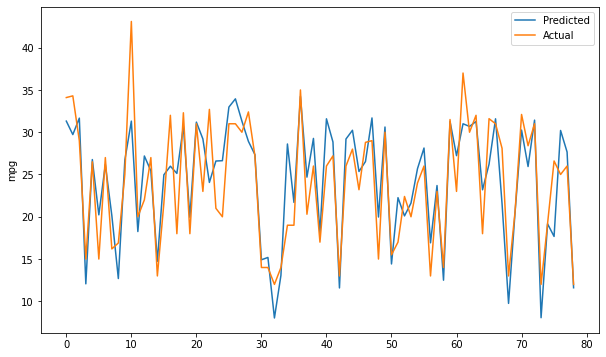

In [207]:
result_dict['mpg ~ single_linear'] = build_model(linear_reg,
                                                 'mpg',
                                                ['weight'],
                                                  automobile_df,
                                                  show_plot_Y=True)

### Test Functions using Linear Regression with Multiple Variables (Kitchen Sink)

Training_score :  0.7010883112043576
Test_score :  0.7329967923959622


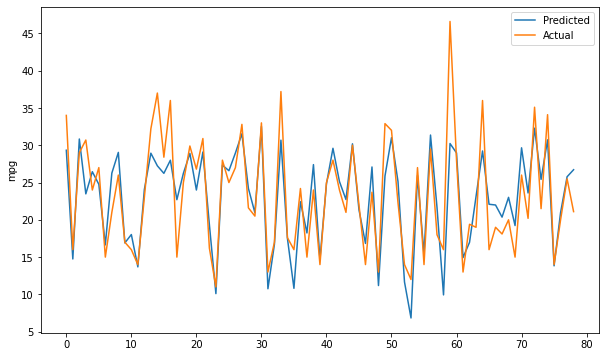

In [208]:
result_dict['mpg ~ kitchen_sink_linear'] = build_model(linear_reg,
                                                      'mpg',
                                                     ['cylinders',
                                                      'displacement',
                                                      'horsepower',
                                                      'weight',
                                                      'acceleration'],
                                                      automobile_df,
                                                      show_plot_Y=True)

### Test Functions with Two Selected Variables (Horsepower and Weight)

Training_score :  0.7326294182079031
Test_score :  0.8007041176884407


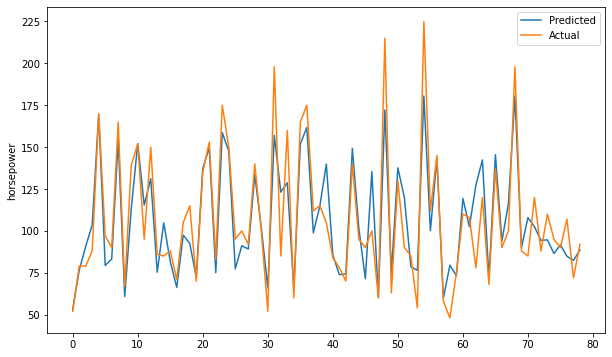

In [211]:
result_dict['mpg ~ parsimonius_linear'] = build_model(linear_reg,
                                                 'horsepower',
                                                ['weight'],
                                                  automobile_df,
                                                  show_plot_Y=True)

In [212]:
compare_results()

Regression:  mpg ~ single_linear
Training score 0.7507582537411106
Test score 0.7051026048788578

Regression:  mpg ~ kitchen_sink_linear
Training score 0.7010883112043576
Test score 0.7329967923959622

Regression:  mpg ~ parsimonius_linear
Training score 0.7326294182079031
Test score 0.8007041176884407



### Lasso

In [213]:
# Higher values of alpha imply more regularisation (default is 1). Don't set to zero!!
def lasso_reg(x_train, y_train, alpha=0.5):
    model = Lasso(alpha=alpha)
    model.fit(x_train, y_train)
    
    return model

Training_score :  0.7171630402084699
Test_score :  0.6726080111011141


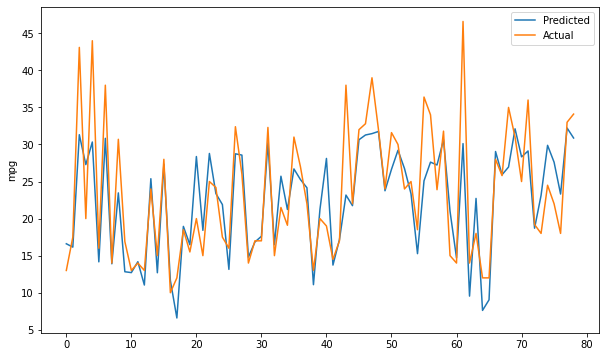

In [220]:
result_dict['mpg ~ kitchen_sink_lasso'] = build_model(lasso_reg,
                                                     'mpg',
                                                    ['cylinders',
                                                     'displacement',
                                                     'horsepower',
                                                     'weight',
                                                     'acceleration'],
                                                      automobile_df,
                                                      show_plot_Y=True)

In [221]:
compare_results()

Regression:  mpg ~ single_linear
Training score 0.7507582537411106
Test score 0.7051026048788578

Regression:  mpg ~ kitchen_sink_linear
Training score 0.7010883112043576
Test score 0.7329967923959622

Regression:  mpg ~ parsimonius_linear
Training score 0.7326294182079031
Test score 0.8007041176884407

Regression:  mpg ~ kitchen_sink_lasso
Training score 0.7171630402084699
Test score 0.6726080111011141

Regression:  mpg ~ kitchen_sink_ridge
Training score 0.6810389609353091
Test score 0.6826896464401131



### Ridge

In [222]:
# reduces the magnitude of coefficients. Alpha determines strength. 
def ridge_reg(x_train, y_train, alpha=0.5, normalize=True):
    model = Ridge(alpha=alpha, normalize=normalize)
    model.fit(x_train, y_train)
    
    return model

Training_score :  0.6898516626819327
Test_score :  0.6612681855149665


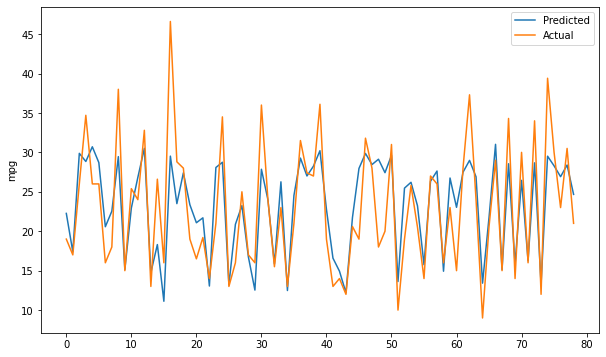

In [223]:
result_dict['mpg ~ kitchen_sink_ridge'] = build_model(ridge_reg,
                                                      'mpg',
                                                     ['cylinders',
                                                      'displacement',
                                                      'horsepower',
                                                      'weight',
                                                      'acceleration'],
                                                       automobile_df,
                                                       show_plot_Y=True)

### Elastic Net

In [219]:
# The l1 ratio is the mixing parameter for the combination of l1 and l2 regularization. L1 = 0 implies ridge regression and vice
## versa. Data not normalized as small dataset. The warm start uses the previous call to fit to initialize. The max iterations of 
### 100000 is found to be optimal.

def elastic_net_reg(x_train, y_train, alpha=1, l1_ratio=0.5, 
                    normalize=False, max_iter=100000, warm_start=True, equivalent_to="Elastic Net"):

    print("Equivalent to:", equivalent_to)
    
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, 
                       normalize=normalize, max_iter=max_iter, warm_start=warm_start)
    model.fit(x_train, y_train)

    return model

Equivalent to: Elastic Net
Training_score :  0.7171174556989026
Test_score :  0.6680227603756599


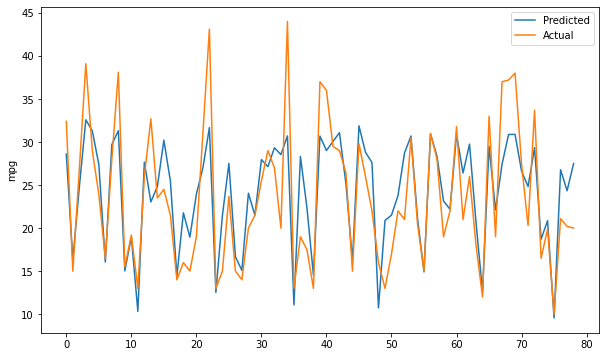

In [224]:
from functools import partial

result_dict['mpg ~ kitchen_sink_elastic_net'] = build_model(partial(elastic_net_reg, alpha=1, l1_ratio=0.5),
                                                            'mpg',
                                                          [ 'cylinders',
                                                            'displacement',
                                                            'horsepower',
                                                            'weight',
                                                            'acceleration'],
                                                            automobile_df,
                                                            show_plot_Y=True)

In [225]:
compare_results()

Regression:  mpg ~ single_linear
Training score 0.7507582537411106
Test score 0.7051026048788578

Regression:  mpg ~ kitchen_sink_linear
Training score 0.7010883112043576
Test score 0.7329967923959622

Regression:  mpg ~ parsimonius_linear
Training score 0.7326294182079031
Test score 0.8007041176884407

Regression:  mpg ~ kitchen_sink_lasso
Training score 0.7171630402084699
Test score 0.6726080111011141

Regression:  mpg ~ kitchen_sink_ridge
Training score 0.6898516626819327
Test score 0.6612681855149665

Regression:  mpg ~ kitchen_sink_elastic_net
Training score 0.7171174556989026
Test score 0.6680227603756599



Best model is the parsimonious linear model

## SVR or Linear SVR (SVR with linear kernel)

In [226]:
# Epsilon is the margin into which the SV tries to fit points is 2 x epsilon. C is a penalty to those outside the margin
## seeks to reduce margin violations (high value imposes heavy penalty on outliers)

def svr_reg(x_train, y_train, kernel='linear', epsilon=0.05, C=0.3):
    model = SVR(kernel=kernel, epsilon=epsilon, C=C)
    model.fit(x_train,y_train)
    
    return model

Training_score :  0.7127287088460419
Test_score :  0.6601770744983839


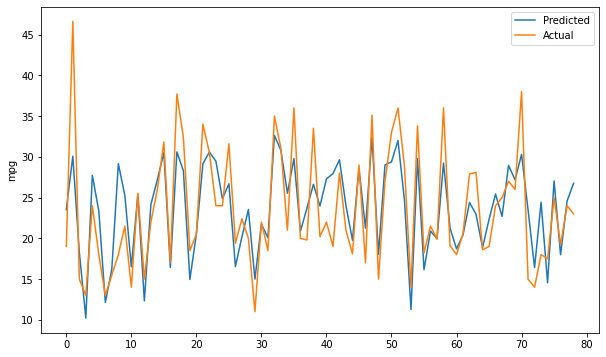

In [227]:
result_dict['mpg ~ kitchen_sink_svr'] = build_model(svr_reg,
                                                    'mpg',
                                                   ['cylinders',
                                                    'displacement',
                                                    'horsepower',
                                                    'weight',
                                                    'acceleration'],
                                                     automobile_df,
                                                     show_plot_Y=True)

## K Nearest Neighbours

In [228]:
def kneighbors_reg(x_train, y_train, n_neighbors=10):
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(x_train, y_train)
    
    return model

Training_score :  0.7510187030355608
Test_score :  0.7573134776515442


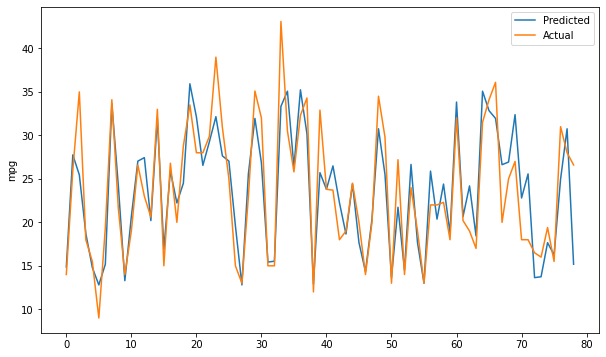

In [229]:
result_dict['mpg ~ kitchen_sink_kneighbors'] = build_model(kneighbors_reg,
                                                           'mpg',
                                                          ['cylinders',
                                                           'displacement',
                                                           'horsepower',
                                                           'weight',
                                                           'acceleration'],
                                                           automobile_df,
                                                           show_plot_Y=True)

## Stochastic Gradient Descent

In [230]:
# Scale and standardise before using this algorithm
def apply_standard_scaler(x):
    scaler = StandardScaler()
    scaler.fit(x)  

    return scaler.transform(x)

In [231]:
# tol is the tolerance or stopping criterion (stop when the loss at each consecutive iteration falls to below this tolerance)
def sgd_reg(x_train, y_train, max_iter=10000, tol=1e-3):
    model = SGDRegressor(max_iter=max_iter, tol=tol)
    model.fit(x_train, y_train)
    
    return model

Training_score :  0.7059438261254177
Test_score :  0.703960702447163


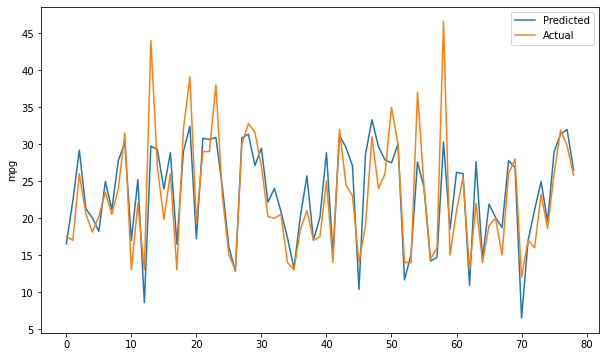

In [232]:
result_dict['mpg ~ kitchen_sink_sgd'] = build_model(sgd_reg,
                                                   'mpg',
                                                  ['cylinders',
                                                   'displacement',
                                                   'horsepower',
                                                   'weight',
                                                   'acceleration'],
                                                    automobile_df,
                                                    show_plot_Y=True,
                                                    preprocess_fn=apply_standard_scaler)

## Decision Tree Regressor

In [233]:
def decision_tree_reg(x_train, y_train, max_depth=2):
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(x_train, y_train)
    
    return model

Training_score :  0.735241048264524
Test_score :  0.7092581059208121


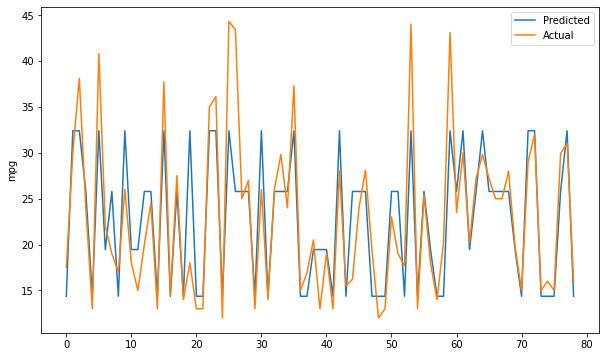

In [234]:
result_dict['mpg ~ kitchen_sink_decision_tree'] = build_model(decision_tree_reg,
                                                             'mpg',
                                                            ['cylinders',
                                                             'displacement',
                                                             'horsepower',
                                                             'weight',
                                                             'acceleration'],
                                                              automobile_df,
                                                              show_plot_Y=True)

## Least Angle Regressor

In [236]:
def lars_reg(x_train, y_train, n_nonzero_coefs=4):
    model = Lars(n_nonzero_coefs=n_nonzero_coefs)
    model.fit(x_train, y_train)
    
    return model

Training_score :  0.6951826514533612
Test_score :  0.7514910461761037


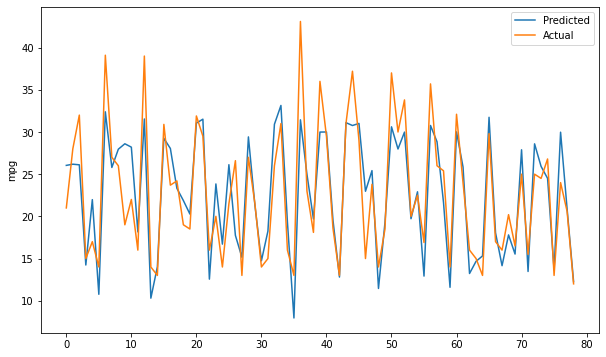

In [237]:
result_dict['mpg ~ kitchen_sink_lars'] = build_model(lars_reg,
                                                    'mpg',
                                                   ['cylinders',
                                                    'displacement',
                                                    'horsepower',
                                                    'weight',
                                                    'acceleration'],
                                                     automobile_df,
                                                     show_plot_Y=True)

In [238]:
compare_results()

Regression:  mpg ~ single_linear
Training score 0.7507582537411106
Test score 0.7051026048788578

Regression:  mpg ~ kitchen_sink_linear
Training score 0.7010883112043576
Test score 0.7329967923959622

Regression:  mpg ~ parsimonius_linear
Training score 0.7326294182079031
Test score 0.8007041176884407

Regression:  mpg ~ kitchen_sink_lasso
Training score 0.7171630402084699
Test score 0.6726080111011141

Regression:  mpg ~ kitchen_sink_ridge
Training score 0.6898516626819327
Test score 0.6612681855149665

Regression:  mpg ~ kitchen_sink_elastic_net
Training score 0.7171174556989026
Test score 0.6680227603756599

Regression:  mpg ~ kitchen_sink_svr
Training score 0.7127287088460419
Test score 0.6601770744983839

Regression:  mpg ~ kitchen_sink_kneighbors
Training score 0.7510187030355608
Test score 0.7573134776515442

Regression:  mpg ~ kitchen_sink_sgd
Training score 0.7059438261254177
Test score 0.703960702447163

Regression:  mpg ~ kitchen_sink_decision_tree
Training score 0.73524104

## Hyperparameter Tuning

### Lasso Regression

In [244]:
parameters = {'alpha': [0.2, 0.4, 0.6, 0.7, 0.8, 0.9, 1.0]}

grid_search = GridSearchCV(Lasso(), parameters, cv=3, return_train_score=True)
grid_search.fit(x_train, y_train)

grid_search.best_params_

{'alpha': 0.2}

In [245]:
for i in range(len(parameters['alpha'])):
    print('Parameters: ', grid_search.cv_results_['params'][i])

    print('Mean Test Score: ', grid_search.cv_results_['mean_test_score'][i])
    
    print('Rank: ', grid_search.cv_results_['rank_test_score'][i])

Parameters:  {'alpha': 0.2}
Mean Test Score:  0.5165030700049303
Rank:  1
Parameters:  {'alpha': 0.4}
Mean Test Score:  0.35314807637965595
Rank:  2
Parameters:  {'alpha': 0.6}
Mean Test Score:  0.09423564242789632
Rank:  3
Parameters:  {'alpha': 0.7}
Mean Test Score:  -0.07105461467041552
Rank:  4
Parameters:  {'alpha': 0.8}
Mean Test Score:  -0.24589260315941938
Rank:  5
Parameters:  {'alpha': 0.9}
Mean Test Score:  -0.3244387323363846
Rank:  6
Parameters:  {'alpha': 1.0}
Mean Test Score:  -0.3701398432551413
Rank:  7


In [246]:
lasso_model = Lasso(alpha=grid_search.best_params_['alpha']).fit(x_train, y_train)

In [247]:
y_pred = lasso_model.predict(x_test)

print('Training score: ', lasso_model.score(x_train, y_train))
print('Test score: ', r2_score(y_test, y_pred))

Training score:  0.6435008570911398
Test score:  0.5021187327952561


### K Neighbours

In [266]:
parameters = {'n_neighbors': [10, 12, 14, 18, 20, 25, 30, 35, 50]}

grid_search = GridSearchCV(KNeighborsRegressor(), parameters, cv=3, return_train_score=True)
grid_search.fit(x_train, y_train)

grid_search.best_params_

{'n_neighbors': 10}

In [267]:
for i in range(len(parameters['n_neighbors'])):
    print('Parameters: ', grid_search.cv_results_['params'][i])
    print('Mean Test Score: ', grid_search.cv_results_['mean_test_score'][i])
    print('Rank: ', grid_search.cv_results_['rank_test_score'][i])

Parameters:  {'n_neighbors': 10}
Mean Test Score:  0.3338846866457115
Rank:  1
Parameters:  {'n_neighbors': 12}
Mean Test Score:  0.29313319122440185
Rank:  2
Parameters:  {'n_neighbors': 14}
Mean Test Score:  0.2738231618215545
Rank:  3
Parameters:  {'n_neighbors': 18}
Mean Test Score:  0.18330419255640465
Rank:  4
Parameters:  {'n_neighbors': 20}
Mean Test Score:  0.16873603704213813
Rank:  5
Parameters:  {'n_neighbors': 25}
Mean Test Score:  0.023590934217910697
Rank:  6
Parameters:  {'n_neighbors': 30}
Mean Test Score:  -0.06619079286558012
Rank:  7
Parameters:  {'n_neighbors': 35}
Mean Test Score:  -0.12736340803996338
Rank:  8
Parameters:  {'n_neighbors': 50}
Mean Test Score:  -0.2718617463371085
Rank:  9


In [268]:
kneighbors_model = KNeighborsRegressor(n_neighbors=grid_search.best_params_['n_neighbors']).fit(x_train, y_train)

In [269]:
y_pred = kneighbors_model.predict(x_test)

print('Training score: ', kneighbors_model.score(x_train, y_train))
print('Testing score: ', r2_score(y_test, y_pred))

Training score:  0.6328661736034711
Testing score:  0.6384680985470627


In [270]:
parameters = {'max_depth':[1, 2, 3, 4, 5, 7, 8]}

grid_search = GridSearchCV(DecisionTreeRegressor(), parameters, cv=3, return_train_score=True)
grid_search.fit(x_train, y_train)

grid_search.best_params_

{'max_depth': 4}

In [271]:
decision_tree_model = DecisionTreeRegressor(max_depth=grid_search.best_params_['max_depth']).fit(x_train, y_train)

In [272]:
y_pred = kneighbors_model.predict(x_test)

print('Training score: ', kneighbors_model.score(x_train, y_train))
print('Testing score: ', r2_score(y_test, y_pred))

Training score:  0.6328661736034711
Testing score:  0.6384680985470627


In [273]:
parameters = {'epsilon': [0.05, 0.1, 0.2, 0.3],
              'C': [0.2, 0.3]}

grid_search = GridSearchCV(SVR(kernel='linear'), parameters, cv=3, return_train_score=True)
grid_search.fit(x_train, y_train)

grid_search.best_params_

{'C': 0.3, 'epsilon': 0.3}

In [274]:
svr_model = SVR(kernel='linear',
                epsilon=grid_search.best_params_['epsilon'], 
                C=grid_search.best_params_['C']).fit(x_train, y_train)

In [275]:
y_pred = svr_model.predict(x_test)

print('Training score: ', svr_model.score(x_train, y_train))
print('Testing score: ', r2_score(y_test, y_pred))

Training score:  0.8461803519810794
Testing score:  0.6977250467441056
